<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 


### Tutorial
# Deploying your Machine Learning Model

<div style="text-align: right;">Author: Maxim Klyuchnikov</div>
<hr>

<h2>Table of Contents</h2>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction">1. Introduction</a></span>
            <ul class="toc-item">
                <li><span><a href="#1.1.-Who-this-tutorial-is-for">1.1. Who this tutorial is for</a></span></li>
                <li><span><a href="#1.2.-What-we're-gonna-use">1.2. What we're gonna use</a></span></li>
                <li><span><a href="#1.3.-Why-is-it-important-to-know-how-to-do-it?">1.3. Why is it important to know how to do it?</a></span></li>
                <li><span><a href="#1.4.-Disclaimer">1.4. Disclaimer</a></span></li>
            </ul>
        </li>
        <li><span><a href="#2.-Building-our-Model">2. Building our Model</a></span>
            <ul class="toc-item">
                <li><span><a href="#2.1.-Usual-Machine-Learning-workflow">2.1. Usual Machine Learning workflow</a></span></li>
                <li><span><a href="#2.2.-The-Model">2.2. The Model</a></span></li>
                <li><span><a href="#2.3.-Persisting-The-Model">2.3. Persisting The Model</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#2.3.1.-scikit-learn-Pipelines">2.3.1. scikit-learn Pipelines</a></span></li>
                        <li><span><a href="#2.3.2.-Python-and-library-versions">2.3.2. Python and library versions</a></span></li>
                        <li><span><a href="#2.3.3.-Wrapping-all-of-the-model-data">2.3.3. Wrapping all of the model data</a></span></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><span><a href="#3.-Wrapping-The-Model-in-Web-Application">3. Wrapping The Model in Web Application</a></span>
            <ul class="toc-item">
                <li><span><a href="#3.1.-Create-an-endpoint-for-predictions">3.1. Create an endpoint for predictions</a></span></li>
                <li><span><a href="#3.2.-Incoming-data-validation">3.2. Incoming data validation</a></span></li>
                <li><span><a href="#3.3.-Testing-the-API-call">3.3. Testing the API call</a></span></li>
                <li><span><a href="#3.4.-Running-web-application">3.4. Running web application</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#3.4.1.-Preparing-file-structure">3.4.1. Preparing file structure</a></span></li>
                        <li><span><a href="#3.4.2.-Run-Flask-development-server">3.4.2. Run Flask development server</a></span></li>
                        <li><span><a href="#3.4.3.-Try-it-with-browser">3.4.3. Try it with browser</a></span></li>
                        <li><span><a href="#3.4.4.-Try-it-with-Python">3.4.4. Try it with Python</a></span></li>
                        <li><span><a href="#3.4.5.-Flask-tricks">3.4.5. Flask tricks</a></span></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><span><a href="#4.-Deployment-to-Heroku">4. Deployment to Heroku</a></span>
            <ul class="toc-item">
                <li><span><a href="#4.1.-Setting-up">4.1. Setting up</a></span></li>
                <li><span><a href="#4.2.-Prepare-our-app-for-Heroku">4.2. Prepare our app for Heroku</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#4.2.1.-Procfile">4.2.1. Procfile</a></span></li>
                        <li><span><a href="#4.2.2.-requirements.txt">4.2.2. requirements.txt</a></span></li>
                    </ul>
                </li>
                <li><span><a href="#4.3.-Initialize-local-Git-repository">4.3. Initialize local Git repository</a></span></li>
                <li><span><a href="#4.4.-Create-Heroku-application">4.4. Create Heroku application</a></span></li>
                <li><span><a href="#4.5.-Pushing-your-application">4.5. Pushing your application</a></span></li>
            </ul>
        </li>
        <li><span><a href="#5.-Missing-Parts">5. Missing Parts</a></span>
            <ul class="toc-item">
                <li><span><a href="#5.1.-Versioning">5.1. Versioning</a></span></li>
                <li><span><a href="#5.2.-Dependency-management">5.2. Dependency management</a></span></li>
                <li><span><a href="#5.3.-Containerizing-your-application">5.3. Containerizing your application</a></span></li>
                <li><span><a href="#5.4.-Scalability">5.4. Scalability</a></span></li>
                <li><span><a href="#5.5.-Persisting-input-data">5.5. Persisting input data</a></span></li>
                <li><span><a href="#5.6.-Heavy-workloads-and-models">5.6. Heavy workloads and models</a></span></li>
                <li><span><a href="#5.7.-Other-deployment-options">5.7. Other deployment options</a></span></li>
            </ul>
        </li>
    </ul>
</div>

# 1. Introduction

So, you have your brand new shiny ML model and you're impatient to let the world to see and use it :)
<br />
The model was developed in Jupyter Notebook with Python, but how to make it available for other people and external systems now?
<br />
That is the question I hope to be answered for you after following this tutorial.
<hr>
Here's an application containing a model which we are going to develop and deploy: https://mlcourse-tutorial-deployment.herokuapp.com/

## 1.1. Who this tutorial is for
* novice machine learning practitioners, who seek for an easy way to deploy their models
* software engineers who are not familiar with the specifics of deploying machine learning models
* anyone who just want to bring their proof-of-concept model online to demonstrate and evaluate

## 1.2. What we're gonna use
* **scikit-learn** to build the machine learning model
* **Joblib** to persist the model
* **Flask** as a web microframework and local development server
* **Git** as a way to deliver our model and application
* **Heroku** as a simple PaaS hosting for our application
* a pinch of **HTML/CSS/JavaScript**, to look nice

## 1.3. Why is it important to know how to do it?
Let's start from the root of the problem - there is still no strict definition of who the Data Scientist is. If you ask ten people with Data Scientist title about their job, you'll probably get ten very different answers, varying from doing Excel calculations to developing the math models behind the [AlphaZero](https://en.wikipedia.org/wiki/AlphaZero).

Giving the vague definition of the Data Scientist (by Data Scientists themselves), it's no wonder that many business people don't understand it either :)

In ideal world creating the math model, implementing it in a form of machine learning model, making it available for production and deployment/maintenance should be done by different people with different job titles, however it's still not so common case to see. So you must be prepared that _making the model available to use might be a part of your job_.

Aside from that, there are other reasons to learn it:

* there is a whole world ouside of the Jupyter Notebook. Like it or not, as a good Data Scientist, you have to understand how your model will be used by external systems and what type of problems exist in the area of integration between the applications;
* for curious person it's always nice to see what's is going on under the hood of the services which provide ready-to-use ML models through the APIs. We will build our solution using pretty basic tools, so you should get an understanding of how things work on a relatively low level;
* ability to deploy your own model is an important skill to add to your Data Scientist toolbox. It's not as hard as some of the machine learning algorithms, but it will make you differ from your colleagues or other job candidates. There is a fancy buzzword for this skill: **productionizing** the model - we'll make a tiny step in this direction;
* don't let your model feel alone, let others talk to it :)

## 1.4. Disclaimer
While the approach presented here is suitable for showing the proof-of-concept and early version of your model, it might not be sufficient for heavy models or very intensive workloads. See <a href="#Missing-Parts">Missing Parts</a> section for details about what need to be considered for more complex and production-ready scenarios.

# 2. Building our Model

## 2.1. Usual Machine Learning workflow
Let's see what we usually have in our simple ML workflow and get an idea of what parts need to be deployed:
<img src="../../img/tutorial-deployment-ml-workflow.png" />

In most cases we have to take **Feature Processing**, **Persisted Model**, **Make Predictions** parts with us.

In cases when our ML model supports [online training](https://en.wikipedia.org/wiki/Online_machine_learning), we can also take the **Model Training** part. Essentially, online traning allows to partially train the model with new data only, without the need to re-train it on the whole dataset, which is especially useful for large datasets and complex models. For the sake of simplicity, we will take the offline model.

What is **Persisted Model**? After training the most important part of the model is its weights which this model has calculated. Along with the weights it's always nice to have some metadata describing the algorithm which will use these weights, feature processing pipeline, model version, etc - all these things have to be unloaded from the computer memory and put somewhere (disk / database / cloud). These data is called persisted model and it can be loaded back to memory for future use.

## 2.2. The Model
Since we're mostly interested in stuff around our model, let's take the most _Hello World_'ish dataset in machine learning: [The Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris). Thankfully, scikit-learn already have it included, so we don't even need to download anything.

Let's import the dependencies first:

In [1]:
import warnings

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

warnings.filterwarnings('ignore')

RANDOM_SEED = 17 # because it's the most popular random number between 1 and 20

Now load the dataset and take a look at its properties:

In [2]:
dataset = load_iris()
print('Feature names:', dataset.feature_names)
print('Iris names:', dataset.target_names)
print('Number of instances:', dataset.data.shape[0])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris names: ['setosa' 'versicolor' 'virginica']
Number of instances: 150


Feature names in this format are not convenient for future use, let's convert them:

In [3]:
feature_names = list(map(lambda x: x.replace(' (cm)', '').replace(' ', '_'), dataset.feature_names))
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Load the dataset into DataFrame:

In [4]:
target = np.array([dataset.target_names[x] for x in dataset.target]).reshape(-1, 1)
df_full = pd.DataFrame(
    np.concatenate([dataset.data, target], axis=1),
    columns=feature_names + ['target'])
df_full[feature_names] = df_full[feature_names].astype(float)

df_full.sample(5, random_state=RANDOM_SEED)

,sepal_length,sepal_width,petal_length,petal_width,target
16,5.4,3.9,1.3,0.4,setosa
78,6.0,2.9,4.5,1.5,versicolor
145,6.7,3.0,5.2,2.3,virginica
99,5.7,2.8,4.1,1.3,versicolor
126,6.2,2.8,4.8,1.8,virginica


In [5]:
df_full.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Of course we can't have Data Science-related tutorial without cool chart, so here's one:

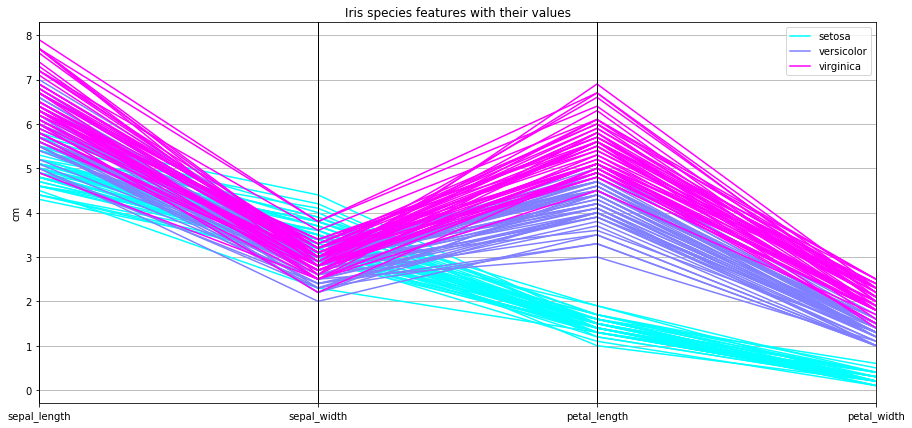

In [6]:
plt.figure(figsize=(15, 7))
parallel_coordinates(df_full, 'target', colormap=plt.get_cmap('cool')) # see - it's cool as promised
plt.title('Iris species features with their values')
plt.ylabel('cm'); # semicolon to suppress the last line output. Plot will be shown anyway, even without plt.show()

Now, let's split our data to train and test, having the holdout set of 40%:

In [7]:
df_train, df_test, y_train, y_test = train_test_split(df_full.drop('target', axis=1), df_full.target, test_size=0.4)
df_train.shape, y_train.shape, df_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

Giving the toy nature of the dataset we're limited in feature engineering, but to have our **Feature Processing** step in place, let's add polynomial features to our data and then scale all features.

Finally, as an estimator we will use plain LogisticRegression.

To have all of these steps in one place, let's put them into the pipeline - it will make our life easier later.

In [8]:
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('poly', PolynomialFeatures()),
        ('scaler', StandardScaler())
    ])),
    ('logreg', LogisticRegression(random_state=RANDOM_SEED))
])

Note that with its default settings PolynomialFeatures will add 15 new features:

In [9]:
', '.join(PolynomialFeatures().fit(df_train).get_feature_names())

'1, x0, x1, x2, x3, x0^2, x0 x1, x0 x2, x0 x3, x1^2, x1 x2, x1 x3, x2^2, x2 x3, x3^2'

Fit the model and draw a confusion matrix:

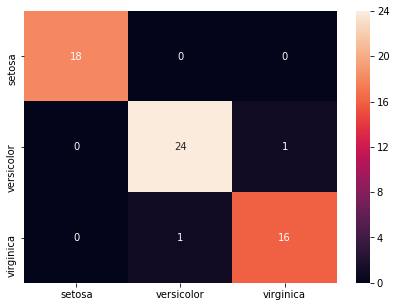

In [10]:
pipeline.fit(df_train, y_train)
pred = pipeline.predict(df_test)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(pred, y_test),
            annot=True,
            xticklabels=dataset.target_names,
            yticklabels=dataset.target_names);

And yay, we've got pretty good results :)

Let's make some predictions based on the cool chart above, like if we did real measurements. Take the values in such a way that we will get a _setosa_ class:

In [11]:
pipeline.predict(pd.DataFrame([{
    'sepal_length': 4.0,
    'sepal_width': 5.0,
    'petal_length': 1.0,
    'petal_width': 0.5
}]))

array(['virginica'], dtype=object)

Hmmm, it's not _setosa_, so what happened? Let's check how the DataFrame is constructed:

In [12]:
pd.DataFrame([{
    'sepal_length': 4.0,
    'sepal_width': 5.0,
    'petal_length': 1.0,
    'petal_width': 0.5
}])

,petal_length,petal_width,sepal_length,sepal_width
0,1.0,0.5,4.0,5.0


Here is the problem: when initializing from a dictionary, the order of the columns in DataFrame is not guaranteed to be the same as in dictionary passed. Although note that we actually do not need DataFrame here - we can pass simple list without column names, but DataFrame is better for readability and our convenience.

The workaround is to pass the ```columns=dictionary.keys()``` to DataFrame constructor or just select the DataFrame columns before doing the predictions:

In [13]:
df_predict = pd.DataFrame([{
    'sepal_length': 4.0,
    'sepal_width': 5.0,
    'petal_length': 1.0,
    'petal_width': 0.5
}])
pipeline.predict(df_predict[feature_names])

array(['setosa'], dtype=object)

Okay, now we're good, but let's remember this behaviour to workaround it later as well.

## 2.3. Persisting The Model
After the training model have to be persisted. Basically, it's done by serializing the model state from the memory to file on disk in some specific format. It's common to use [pickle](https://docs.python.org/3/library/pickle.html) binary serialization in Python for that, but due to [performance](https://scikit-learn.org/stable/modules/model_persistence.html) reasons we will use [joblib](https://joblib.readthedocs.io/en/latest/persistence.html) (which still use pickle internally).

Note that both pickle and joblib have problems with security - you have to be sure that the file you're trying to deserialize was not replaced by an attacker because it's possible to force Python to execute malicious code during deserialization. You can see how it works with more details [here](https://rushter.com/blog/pickle-serialization-internals/).

What exactly have to be persisted in our case? Obviously, the following things need to be saved:
* the model itself which is ```LogisticRegression``` estimator in our case - it contains the weights and logic on how to process these weights;
* feature processing steps which represented by ```PolynomialFeatures``` and ```StandardScaler``` - saving them will allow us to process date for predictions in exactly the same manner as we did for training.

Not so obvious, but still nice to have:
* model version - for our own convenience and to be able to distinguish different models between each other;
* incoming feature names or any other info which describe input and/or output data.

### 2.3.1. scikit-learn Pipelines
Before we proceed, let's pretend that we have our ```PolynomialFeatures``` and ```StandardScaler``` as separate objects. In this case we would need to save them and ```LogisticRegression``` as separate entities which introduce too much hassle, especially if our model eventually grow and other feature processing steps will be added.

So, there are many good reasons to use the scikit-learn pipelines and here is another one: we can persist just our ```Pipeline``` object and have all of the steps stored as a single entity in one file.

### 2.3.2. Python and library versions
Also when serializing your model you have to be aware that serialized object might not load in different version of Python or with another version of the library, classes of which were serialized. That's why it's always good to fix and keep the Python and all of the related library versions along with the model. We will do it in this tutorial.

### 2.3.3. Wrapping all of the model data
Let's create a class which will contain a model and all additional metadata:

In [16]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline


class IrisModel:
    def __init__(self, pipeline: Pipeline, version='unknown', input_features=[], class_names=[]):
        self.pipeline = pipeline

        self.version = version
        self.input_features = input_features
        self.class_names = class_names

    def predict(self, data: pd.DataFrame) -> np.ndarray:
        data = data[
            self.input_features]  # this is the workaround for the problem with DataFrame fields order, see above
        return self.pipeline.predict(data)

    # pretty-print our class in Jupyter notebook and when we're converting it to string
    def __repr__(self):
        return (f'{self.__class__.__name__}('
                f'{self.pipeline!r}, '
                f'version={self.version!r}, '
                f'input_features={self.input_features!r}, '
                f'class_names={self.class_names!r})')

Put the content of the cell above into file named **iris_model.py** and save it to the same directory from where you're running this notebook. Saving this class to file (which become a Python module actually) is necessary to workaround problem with persistence of classes which are not the part of any module.

Now create the instance of this class, fill with our data and serialize to file:

In [17]:
from iris_model import IrisModel

iris_model = IrisModel(pipeline,
                       version='0.1',
                       input_features=df_train.columns.values,
                       class_names=dataset.target_names)

joblib.dump(iris_model, 'iris-model-v%s.jl' % iris_model.version)

['iris-model-v0.1.jl']

# 3. Wrapping The Model in Web Application

Now we're ready to build our web application which will serve our model to outside world. Let's take [Flask](http://flask.pocoo.org/) as a web-framework because of its simplicity, small CPU and memory footprint and easy portability.

This web application will expose a basic Web API which will be available for browsers and any other 3rd-party system to use over the HTTP protocol. So it will have its own URL which you can directly type in the browser or call programmatically using any programming language, not necessarily Python.

Also, nowadays it's common to use [JSON](https://en.wikipedia.org/wiki/JSON) as a default format for most of the Web APIs, so we will stick to it as well.

First, install the Flask itself:

In [ ]:
!pip install -U flask

Import necessary dependencies and initialize Flask application:

In [18]:
from flask import Flask, request, jsonify, make_response
from flask.testing import FlaskClient
from werkzeug import Request

app = Flask(__name__)

Load persisted model wrapper into the variable:

In [19]:
IRIS_MODEL = joblib.load('iris-model-v0.1.jl')
IRIS_MODEL

IrisModel(Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))],
       transformer_weights=None)), ('logreg', LogisticRegression(C=1.0, cla..., penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]), version='0.1', input_features=array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object), class_names=array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

Try to predict with the same values as we already did for pipeline before:

In [20]:
df_predict = pd.DataFrame([{
    'sepal_length': 4.0,
    'sepal_width': 5.0,
    'petal_length': 1.0,
    'petal_width': 0.5
}])
IRIS_MODEL.predict(df_predict[feature_names])

array(['setosa'], dtype=object)

## 3.1. Create an endpoint for predictions
Flask, as a typical web framework allows us to expose _endpoints_ with their specific URLs, _routes_, and bind these routes to our custom methods which will perform the actions we need and return their results.

Let's create the ```/predict``` endpoint:

In [21]:
app = Flask(__name__)

@app.route('/predict', methods=['POST']) # Flask decorator to mark the method which will be called when application recieved
                                         # an HTTP request to /predict URL using the POST method
def predict():
    # here we expect an HTTP request body with the following data in JSON format:
    # [ {"sepal_length": 4.0, "sepal_width": 5.0, "petal_length": 1.0, "petal_width": 0.5},
    #   {"sepal_length": 3.0, "sepal_width": 3.0, "petal_length": 2.0, "petal_width": 4} ]
    data = request.get_json() # get the request body as a Python list of dictionaries

    df_predict = pd.DataFrame(data)
    predictions = IRIS_MODEL.predict(df_predict)
    predictions = predictions.tolist()
    
    return jsonify({
        'version': IRIS_MODEL.version, # return model version to calling side
        'status': 'success',           # indicate that the call went well
        'predictions': predictions     # actual predictions, ["setosa", "virginica"]
    })

As you see, our endpoint is represented by ```/predict``` route which is bound to ```predict()``` method.
* this method is called by Flask after it processed the incoming HTTP request and found which method is responsible for further processing;
* we take the JSON from the body of HTTP request, convert it to the list of Python dictionaries, feed them into DataFrame and make a predictions;
* finally, this method convert the predictions to JSON format and return them back to the Flask;
* Flask forms HTTP response and return it back to the calling side (browser or another application).

As a rule of thumb, it's better to make your prediction endpoints to work with multiple predictions at once, due to:
* performance reasons - multiple predictions are generally done faster;
* convenience - clients of your API will be able to work with just one endpoint by sending both single and multiple prediction requests to it.

## 3.2. Incoming data validation
As you see, the incoming format of the data is pretty complex and there are many ways to send something incorrect or even malicious. For this we need to have some sort of data validation to be sure that we actually can process the input data without any problems.

But since it's a very broad topic we will skip it. Anyway, take time to learn the one of the following ways to validate JSON in Python: [Cerebrus](http://docs.python-cerberus.org/en/stable/), [jsonschema](https://python-jsonschema.readthedocs.io/en/latest/).

## 3.3. Testing the API call
That's another broad topic, actually :) In most cases when your application grows, you'd have to use unit tests ([unittest](https://docs.python.org/3/library/unittest.html), [pytest](https://docs.pytest.org/en/latest/)) to check if it's behaving as expected, especially when it's being refactored or actively developed.

Here we will do some basic checks using the ```FlaskClient``` and asserts, which still work inside the Jupyter notebook and will allow you to debug your endpoint:

In [22]:
# prepare some test data
test_objects = df_train.sample(3, random_state=RANDOM_SEED)

expected_results = IRIS_MODEL.predict(test_objects).tolist()
expected_results = expected_results

data_to_send = [row.to_dict() for i, row in test_objects.iterrows()]

data_to_send, '---', expected_results

([{'sepal_length': 6.4,
   'sepal_width': 2.7,
   'petal_length': 5.3,
   'petal_width': 1.9},
  {'sepal_length': 4.8,
   'sepal_width': 3.4,
   'petal_length': 1.6,
   'petal_width': 0.2},
  {'sepal_length': 5.1,
   'sepal_width': 3.4,
   'petal_length': 1.5,
   'petal_width': 0.2}],
 '---',
 ['virginica', 'setosa', 'setosa'])

In [23]:
# normal successful request
with app.test_client() as client: # client is a FlaskClient object
    response = client.post('/predict', json=data_to_send)
    
    assert response.status_code == 200
    assert response.get_json()['status'] == 'success'
    assert response.get_json()['predictions'] == expected_results
'done'

'done'

## 3.4. Running web application

Okay, now we have all components in place to be able to run our web app and make our first real call to it.

### 3.4.1. Preparing file structure
We can't stay inside the Python notebook anymore, so we need to put or code in separate files according to the Flask-compatible structure:
```
+---static
|       irises.png
|       main.css
+---templates
|       index.html       # we'll have a '/' route for this page - it will be the start page of our site
|                        # this is not needed for the model to work
|                        # it's just a simple UI to play with our Flask endpoint from the browser
|   iris-model-v0.1.jl   # our previously saved model, just copy it here
|   iris_app.py
|   iris_model.py        # use the same file which you should already have (see "Wrapping all of the model data" section)
```

##### static/irises.png
<img src="../../img/tutorial-deployment-irises.png" width="700" />

##### static/main.css
```css
html,
body {
    height: 100%;
}

body {
    display: -ms-flexbox;
    display: flex;
    -ms-flex-align: center;
    align-items: center;
    padding-top: 40px;
    padding-bottom: 40px;
}

.form-predict {
    width: 100%;
    max-width: 700px;
    padding: 15px;
    margin: 0 auto auto;
}

.form-predict .form-control {
    position: relative;
    box-sizing: border-box;
    height: auto;
    padding: 10px;
    font-size: 16px;
}

.form-predict .form-control:focus {
    z-index: 2;
}

.result span {
    color: green;
}```

##### templates/index.html

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>mlcourse.ai tutorial demo application</title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.2/css/bootstrap.min.css"
          integrity="sha384-Smlep5jCw/wG7hdkwQ/Z5nLIefveQRIY9nfy6xoR1uRYBtpZgI6339F5dgvm/e9B" crossorigin="anonymous">
    <link rel="stylesheet" href="static/main.css"/>
</head>
<body class="text-center">
<form class="form-predict" id="predict_form">
    <h1 class="h1">Iris Classification</h1>

    <img class="mb-4" src="static/irises.png" alt="" width="100%"/>

    <hr/>

    <h3 class="h3 mb-3 font-weight-normal">Enter measured characteristics</h3>

    <div class="form-group row">
        <label for="sepal_length" class="col-sm-3 col-form-label">Sepal Length</label>
        <div class="col-sm-8">
            <input type="range" min="4.3" max="7.9" step="0.1" value="5.4" id="sepal_length" class="form-control">
        </div>
        <span id="sepal_length_output" class="col-sm-1 col-form-label"></span>
    </div>

    <div class="form-group row">
        <label for="sepal_width" class="col-sm-3 col-form-label">Sepal Width</label>
        <div class="col-sm-8">
            <input type="range" min="2.0" max="4.4" step="0.1" value="3.7" id="sepal_width" class="form-control">
        </div>
        <span id="sepal_width_output" class="col-sm-1 col-form-label"></span>
    </div>

    <div class="form-group row">
        <label for="petal_length" class="col-sm-3 col-form-label">Petal Length</label>
        <div class="col-sm-8">
            <input type="range" min="1.1" max="6.9" step="0.1" value="1.5" id="petal_length" class="form-control">
        </div>
        <span id="petal_length_output" class="col-sm-1 col-form-label"></span>
    </div>

    <div class="form-group row">
        <label for="petal_width" class="col-sm-3 col-form-label">Petal Width</label>
        <div class="col-sm-8">
            <input type="range" min="0.1" max="2.5" step="0.1" value="0.2" id="petal_width" class="form-control">
        </div>
        <span id="petal_width_output" class="col-sm-1 col-form-label"></span>
    </div>

    <button class="btn btn-lg btn-primary btn-block" type="submit">Predict</button>

    <br/>

    <h2 id="result" class="h2 result"></h2>
</form>
<script type="text/javascript">
    const PREDICT_URL = '/predict';

    // look ma, no jQuery!
    (function () {
        let ranges = document.querySelectorAll('input[type=range');
        ranges.forEach(range => {
            range.addEventListener('input', _ => {
                document.getElementById(range.id + '_output').innerText = range.value;
            });
            document.getElementById(range.id + '_output').innerText = range.value;
        });

        let result = document.getElementById('result');

        document.getElementById('predict_form').addEventListener('submit', (evt) => {
            evt.preventDefault();

            result.innerHTML = '...';

            let data = {};
            ranges.forEach(range => {
                data[range.id] = parseFloat(range.value);
            });

            fetch(PREDICT_URL, {
                method: 'POST',
                body: JSON.stringify([data]),
                headers: {
                    'Content-Type': 'application/json'
                }
            }).then(response => {
                return response.json();
            }).then(response => {
                result.innerHTML = 'Looks like it\'s <span>' + response.predictions[0].toUpperCase() + '</span>';
            }).catch(alert);
        })
    })();
</script>
</body>
</html>```

##### iris_app.py

```python
import joblib
import pandas as pd
from flask import Flask, request, jsonify, render_template

app = Flask(__name__)

IRIS_MODEL = joblib.load('iris-model-v0.1.jl')


@app.route('/')
def index():
    return render_template('index.html')


@app.route('/predict', methods=['POST']) # Flask decorator to mark the method which will be called when application recieved
                                         # an HTTP request to /predict URL using the POST method
def predict():
    # here we expect an HTTP request body with the following data in JSON format:
    # [ {"sepal_length": 4.0, "sepal_width": 5.0, "petal_length": 1.0, "petal_width": 0.5},
    #   {"sepal_length": 3.0, "sepal_width": 3.0, "petal_length": 2.0, "petal_width": 4} ]
    data = request.get_json() # get the request body as a Python list of dictionaries

    df_predict = pd.DataFrame(data)
    predictions = IRIS_MODEL.predict(df_predict)
    predictions = predictions.tolist()

    return jsonify({
        'version': IRIS_MODEL.version, # return model version to calling side
        'status': 'success',           # indicate that the call went well
        'predictions': predictions     # actual predictions, ["setosa", "virginica"]
    })```

### 3.4.2. Run Flask development server
In addition to its web framework capabilities, Flask includes its own development server which is installed along with Python package. This server is not supposed to be used in production because of its pestability and scaling problems, but it works pretty well during the application development.

First, open the command prompt in the folder where you put all of the files above.

To run Flask on our local machine, we need to pass some settings to it using the environment variables. Here is how to do it on Windows:
> set FLASK_APP=iris_app.py && set FLASK_ENV=development && flask run

```
* Serving Flask app "iris_app.py "
* Environment: development
* Debug mode: off
* Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)```

### 3.4.3. Try it with browser

Open the URL which Flask gave to you and you should see something like that:
<img src="../../img/tutorial-deployment-web-app-screen.png" width="700" />

Feel free to play with it and make your own predictions. Refer to cool chart from the model building section to input meaningful data.

### 3.4.4. Try it with Python

As was said previously, you don't have to use a browser to call your web application endpoint. So let's do it with Python.

Assuming that the Flask development server is running, execute the following code:

In [24]:
import requests

response = requests.post('http://127.0.0.1:5000/predict', json=[{
    'sepal_length': 5.0,
    'sepal_width': 3.5,
    'petal_length': 1.3,
    'petal_width': 0.3
}])

response.json()

{'predictions': ['setosa'], 'status': 'success', 'version': '0.1'}

### 3.4.5. Flask tricks
When you change the application files while Flask server is running, you have to restart it since it does not load the changes from the disk automatically. Fortunately, there is an option to force Flask to watch file changes (it enables debugging, but automatic reload is a nice side effect during development):

> set FLASK_APP=iris_app.py && set FLASK_ENV=development **&& set FLASK_DEBUG=1** && flask run


If you run Flask with the host parameter you should be able to show your application to your colleague if you in the same LAN and your port ```5000``` is open:

> set FLASK_APP=iris_app.py && set FLASK_ENV=development && flask run **-h 0.0.0.0**

Now you can proudly hold this badge :) <img src="../../img/tutorial-deployment-works-on-my-machine.png" />

Which is, yeah, definitely awesome, but we'd like to do solutions which works somewhere else, right? So let's go on.

# 4. Deployment to Heroku

[Heroku](https://www.heroku.com/) is a Platform as a Service (PaaS) cloud provider which, by its PaaS nature, allow to skip complex procedures of application deployment while still providing good customization support.

What is also good about Heroku is that it allows you to run one instance of your web application for free, which makes it a platform of choice for proof of concepts or small applications.

## 4.1. Setting up

First, do these things:
* [create an account](https://signup.heroku.com/) on Heroku
* [download](https://devcenter.heroku.com/articles/heroku-cli) and install Heroku CLI, which allows you to work with the platform straight from command line

Once the Heroku CLI is installed, introduce your installation to Heroku by running
> heroku login

which, dependig on your platform, open a browser to perform login or ask for your Heroku login and password in the command line.

## 4.2. Prepare our app for Heroku
When Heroku receive your application files, it need to recognize what type of application your are deploying and how to run it. Often it's done automatically by analyzing the application files, but better to provide exact definition of what we're need Heroku to do.

Let's create couple of files in the app root directory which will tell Heroku how to work with our application.

```
|   Procfile
|   requirements.txt
```

### 4.2.1. Procfile
This is the file which Heroku use to get the commands to execute to start your application and do some post-start actions.
Here is such file for our application:
```
web: gunicorn iris_app:app --log-file -
```
Yes, just a single line. It tells Heroku the following:
* our application must be run as ```web``` appication;
* use ```gunicorn``` as a web server (remember that Flask server is for development only, so we switched to [gunicorn](https://gunicorn.org/)) and pass path to our application within the specific module;
* ```--log-file -``` is an option for gunicorn to output the log information straight to STDOUT - it will be then caught by Heroku and provided as a part of Heroku own logging mechanism.

### 4.2.2. requirements.txt
This file is not Heroku specific - it's a common file used in Python ecosystem to keep the list of the dependencies required for application or library to run. Heroku is able to recognize this file and will requested dependencies while deploying your application.

Here is it:
```
pandas==0.22.0
numpy==1.15.4
scikit-learn==0.20.1
joblib==0.13.0
Flask==1.0.2
gunicorn==19.9.0
```
Note that I've added ```gunicorn``` manually - it does not have to be installed on a local machine, but we need it to be installed on Heroku.
You can see and save the libraries that you have in your Python installation (or, which is way better, in your [virtualenv](https://virtualenv.pypa.io/en/latest/)) by running the following command:
> pip freeze > requirements.txt

However, it will save all of the dependencies which are not used in your application and sub-dependencies as well, which may do no harm, but better to go through the generated file and remove those dependencies which are not necessary for your application to work.

## 4.3. Initialize local Git repository
Heroku allow you to deploy your application by doing a simple git push. To start using Git, we need to run the following commands in the directory with our web application:

Initializing empty Git repository:
> git init

Adding all of the existing files to Git:
> git add .

Commit added files to just created local Git repository:
> git commit -m "iris app initial commit"

## 4.4. Create Heroku application
Run the following command in the app root directory:
> heroku create

It will create weird-named Heroku application for you and add remote Git repository (hosted on Heroku) to your app's Git configuration:

> git remote -v

```
heroku  https://git.heroku.com/blooming-eyrie-32543.git (fetch)
heroku  https://git.heroku.com/blooming-eyrie-32543.git (push)
```

Don't worry that your application is named like ```blooming-eyrie-32543``` - you can [rename](https://devcenter.heroku.com/articles/renaming-apps) it later :) It's done intentionally because Heroku apps must have unique names and we don't want to spend time to find a name which is not being used by someone else. Just for reference, it's possible to use your [custom domain](https://devcenter.heroku.com/articles/custom-domains) on Heroku, if needed.


## 4.5. Pushing your application
Phew, now we're ready to go with actual deployment, which is a simple git push in case of Heroku:

> git push heroku master

```
Counting objects: 12, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (10/10), done.
Writing objects: 100% (12/12), 281.51 KiB | 15.64 MiB/s, done.
Total 12 (delta 0), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote:
remote: -----> Python app detected
remote: -----> Installing python-3.6.7
remote: -----> Installing pip
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
... skipped long long of dependencies installation
remote:
remote: -----> Discovering process types
remote:        Procfile declares types -> web
remote:
remote: -----> Compressing...
remote:        Done: 125.5M
remote: -----> Launching...
remote:        Released v3
remote:        https://blooming-eyrie-32543.herokuapp.com/ deployed to Heroku
remote:
remote: Verifying deploy... done.
To https://git.heroku.com/blooming-eyrie-32543.git
 * [new branch]      master -> master
```

Open the URL provided at the end of the output log - you should see the site app and running.

If for some reason there is an error displaying, it worth to take a look at the Heroku logs (```--tail``` makes them live):

> heroku logs --tail

```
2018-12-13T13:40:49.557538+00:00 heroku[web.1]: Starting process with command `gunicorn app:app --log-file -`
2018-12-13T13:40:49.000000+00:00 app[api]: Build succeeded
2018-12-13T13:40:51.776548+00:00 heroku[web.1]: State changed from starting to crashed
2018-12-13T13:40:51.757263+00:00 heroku[web.1]: Process exited with status 3
2018-12-13T13:40:51.621873+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [4] [INFO] Starting gunicorn 19.9.0
2018-12-13T13:40:51.622501+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [4] [INFO] Listening at: http://0.0.0.0:10953 (4)
2018-12-13T13:40:51.622615+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [4] [INFO] Using worker: sync
2018-12-13T13:40:51.626310+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [10] [INFO] Booting worker with pid: 10
2018-12-13T13:40:51.630939+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [10] [ERROR] Exception in worker process
2018-12-13T13:40:51.630943+00:00 app[web.1]: Traceback (most recent call last):
... skipped stack trace
2018-12-13T13:40:51.630990+00:00 app[web.1]: __import__(module)
2018-12-13T13:40:51.630991+00:00 app[web.1]: ModuleNotFoundError: No module named 'app'
2018-12-13T13:40:51.634161+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [10] [INFO] Worker exiting (pid: 10)
2018-12-13T13:40:51.668563+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [4] [INFO] Shutting down: Master
2018-12-13T13:40:51.668996+00:00 app[web.1]: [2018-12-13 13:40:51 +0000] [4] [INFO] Reason: Worker failed to boot.
```
Here, for example, an incorrect Procfile was provided and gunicorn was unable to find an application.

In addition to error logging this command will also display all of the incoming requests information (per our gunicorn config in Procfile), so you can see if your requests actually reaching the application and see an errors, if any.

Hopefully, everything went fine and now you are able to use your model by using a browser and by calling web app endpoints from any other programming language!

# 5. Missing Parts
Here you can find some thougts and directions about what can be done better with what we did in the tutorial and what could be a potential areas of interest for further learning.

This section is totally subjective, so your mileage may vary.

## 5.1. Versioning
Each time you re-train or change your model internals, it has to have different version.

The API built around the model must have and update its version accordingly if the set of input fields or output data is changed, to not break existing clients. Version + endpoints + format of the input and output data is a **contract** between the service and its clients, it should not be violated freely. Older clients, if they are not under your control, should have an ability to talk to your old API which must be deployed separately from the new one.

It's also good to use appropriate Git branching structure, like [GitFlow](https://www.atlassian.com/git/tutorials/comparing-workflows/gitflow-workflow) or specialized machine learning version control systems, like [DVC](https://dvc.org).

## 5.2. Dependency management
Many multi-libraries systems has its own problems when you need to have multiple versions of the same library used by different applications: [DLL Hell](https://en.wikipedia.org/wiki/DLL_Hell), [JAR Hell](https://dzone.com/articles/what-is-jar-hell), [Python Dependency Hell](https://medium.com/knerd/the-nine-circles-of-python-dependency-hell-481d53e3e025), each has its own <img src="../../img/tutorial-deployment-special-hell.jpg" width="400" />

When it comes to portability between different computers, Python versions and different environments, it's necessary to fix your project dependecies so that you have exactly the same libraries that you had during the development.

We've touched this area a bit by creating the ```requirements.txt```, but you should learn how to use [virtualenv](https://virtualenv.pypa.io/en/latest/), if you don't yet.

As an extreme form of dependency management it's possible to use Docker and use it as a replacement of virtualenv - it will also provide you an abstraction from the target operating system since you can fix it in the Docker container as well as Python libraries.

## 5.3. Containerizing your application
As it was mentioned, Docker provide nice abstraction of the environment since you can fix OS, system liraries, installed software and Python libraries inside the Docker cotainer.

Later, this Docker container can be delivered to production in exactly the same state as you had during the development time.
In addition, nowadays there are many cloud providers that allow you to deploy Docker containers as an applications.

Actually, containerizing the ML applications is a pretty big topic which worth another tutorial.

## 5.4. Scalability
It's always worth to know how much hardware resourses do you need for your model to work properly and without slowing its clients.

The first step in this direction is to measure the performance of your final application by sending bunch of queries to it ([ApacheBench](https://en.wikipedia.org/wiki/ApacheBench), [JMeter](https://en.wikipedia.org/wiki/Apache_JMeter)).

Since our application is stateless (means that it does not produce anything that has to be stored between the requests from the same client), we can scale it by simply adding more instances on our hosting service, Heroku.

In addition to that we can [tune gunicorn to process multiple queries simultaneously](https://devcenter.heroku.com/articles/optimizing-dyno-usage#python) by spawning more workers, to be able to utilize single instance resourses more fully.

## 5.5. Persisting input data
Sometime there is a need to collect real data which your model receive after being deployed. Usually that data is kept along with the predictions which your model did.
For example, it could be usable in the following situations:
* you need to analyze that the data sent by clients are still from the same distribution which you had during the training time - so after collecting real data you can analyze it, label, add to the original data and re-train your model;
* it was found that your model give strange results on some input data - having the logs with these data and your model predictions will allow you to debug.

The obvious choice for persistence is using the databases, which is pretty easy in Python.

Be aware that choosing the SQLite (which is just a file on local disk), while hosting your model on PaaS service (like Heroku) might get you in trouble because in most cases local file system there is ephemeral and can be wiped out at any time. So better to choose the database server which is hosted on another machine - PaaS services usually have it as an [option](https://devcenter.heroku.com/categories/data-management).

## 5.6. Heavy workloads and models
The model which we used in the tutorial is very toy'ish and it will not suffer much even under the high load. But for some scenarios the tools which we used might not be enough to keep up. In such cases different technologies which are created specifically for big data and high load, must be considered.

As a Machine Learning practitioner, take a look at the [Spark MLlib](https://spark.apache.org/mllib/) and [H2O](https://www.h2o.ai/products/h2o/).

## 5.7. Other deployment options
There are some other deployment options which are not covered in this tutorial but the core idea is still the same. Take time to learn them or create another tutorial :)
* Docker containers (see above about their pros);
* serverless deployments using [AWS Lambda](https://aws.amazon.com/lambda/) or [Azure Functions](https://docs.microsoft.com/en-us/azure/azure-functions/) - they will allow you to run your model on demand, usually using much less resources and money. It's another great way to deploy proof-of-concepts and small models to production;
* self-hosted, when you want to have the total control over your hardware and software or you have to use your models inside the organization's network. This way require a lot more efforts and it's better to have experienced DevOps in the team for help.